In [ ]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import os
from google.colab import drive

## Know Your Data

In [ ]:
# Load dataset 
## from local directory
file = files.upload()
df = pd.read_csv('cardio_train.csv', sep=';') # slow 

# from google drive directory
# drive.mount('/content/drive/')
# %cd '/content/drive/My Drive/Data_Mining/Project/'
# !pwd
# !ls
# df = pd.read_csv('cardio_train.csv', sep=';') # slow 

Saving cardio_train.csv to cardio_train (1).csv


In [ ]:
# Glimpse of Data
## show the first 5 records
display(df.head())
# ?pd.read_csv

## get number of rows and cols
print(df.shape)

## statistics summmary
df.describe()

## display datatype for all columns
display(df.dtypes)
len(df._get_numeric_data().columns) # all is numeric, false 

## get the first 5 records for vis.
df.head().to_csv('data_first_5.csv')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


(70000, 13)


id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## Data Preprocessing

In [ ]:
# Drop ID column
# df = df.drop(columns='id')
# display(df)

# Rename the columns, ap_hi, ap_lo, cardio
df = df.rename(columns = {'ap_hi': 'systolic_blood_pressure',
         'ap_lo': 'diastolic_blood_pressure', 
         'gluc': 'glucose', 
         'alco': 'alcohol', 
         'active': 'physical_activity',
         'cardio': 'heart_disease'})
display(df)

# Change data type for categorical variable
c_col_name = ['gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'physical_activity', 'heart_disease']
df[c_col_name] = df[c_col_name].astype('category')
print(df.dtypes)

## Change age from days to year -- exe. before sns.pairplot 
df.age = df.age.apply(lambda x: int(x/365))

## 
display(df.describe())
round(df.describe()).astype(int).to_csv('summary_statistics.csv')

,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


id                             int64
age                            int64
gender                      category
height                         int64
weight                       float64
systolic_blood_pressure        int64
diastolic_blood_pressure       int64
cholesterol                 category
glucose                     category
smoke                       category
alcohol                     category
physical_activity           category
heart_disease               category
dtype: object


,id,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,164.359229,74.205690,128.817286,96.630414
std,28851.302323,6.766774,8.210126,14.395757,154.011419,188.472530
min,0.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,48.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,53.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,58.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000


In [ ]:
df[df.height < 100].count() 
df[df.diastolic_blood_pressure >400].count()
df[df.systolic_blood_pressure <50]


,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
567,815,58,1,168,78.0,14,90,2,1,0,0,1,1
927,1294,59,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,49,1,172,65.0,11,80,1,3,0,0,1,0
1600,2260,52,1,165,66.0,12,80,1,1,0,0,1,0
1627,2301,61,1,165,71.0,14,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,98039,58,1,160,59.0,12,80,1,1,0,0,1,0
68742,98213,51,1,158,74.0,14,90,1,1,0,0,1,1
68998,98568,52,1,154,77.0,14,90,1,1,0,0,1,0
69137,98743,42,2,176,65.0,12,80,1,1,0,0,1,0


id                          0
age                         0
gender                      0
height                      0
weight                      0
systolic_blood_pressure     0
diastolic_blood_pressure    0
cholesterol                 0
glucose                     0
smoke                       0
alcohol                     0
physical_activity           0
heart_disease               0
dtype: int64
[2, 1]
Categories (2, int64): [1, 2]
[1, 3, 2]
Categories (3, int64): [1, 2, 3]
[1, 2, 3]
Categories (3, int64): [1, 2, 3]
[0, 1]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]


KeyboardInterrupt: ignored

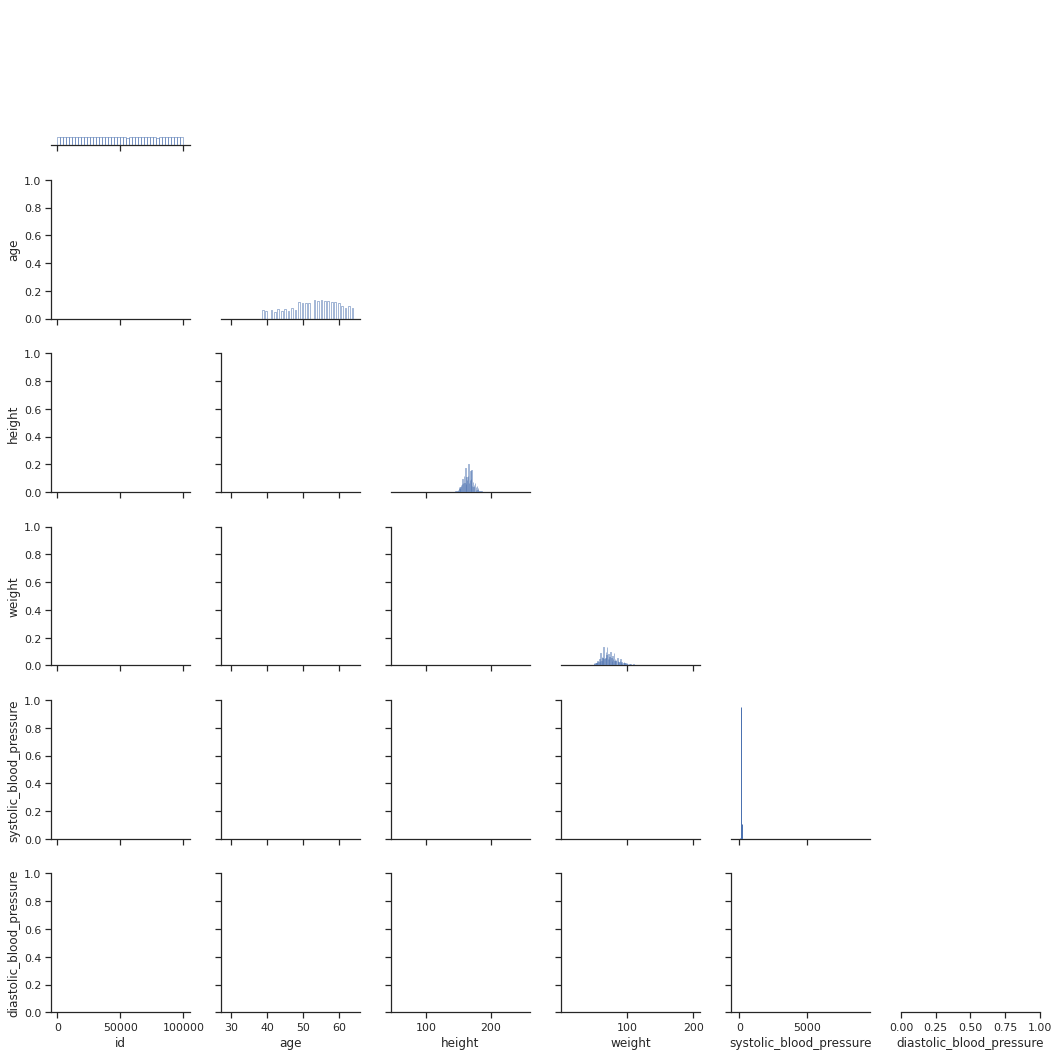

In [ ]:
# Data Cleaning
## Null or not
print(df.isnull().sum())  # no null value

## For Category
## Check if there are consistent data entry, unique(), .values_count()
for col_name in df[c_col_name].columns:
  print(df[col_name].unique())  # all matches

## For Numeric
## Summary statistics continue
## WE CAN DO CLUSTERING ANALYSIS FIRST TO PICK THE REASONABLE FEATURE
## then, remove range errors for all variables
### Also obey the rules from online domain knowledge.  
sns.set_theme(style='ticks')
p = sns.pairplot(df, corner=True,
    diag_kws=dict(fill=False))
p.fig.suptitle("Pairplot for Outlier Estimates", size = 18, weight = 'bold')
plt.savefig('Pairplot.Jpg')

In [ ]:
## Domain knowledge for selecting all resonable variables
### age orignial[30，65] --> Good

### height original[55, 250]cm --> no --> resonable male[155.6，201.2] Female[143.6,186]
##### https://ourworldindata.org/human-height
# print(df.head())
# print(df.gender.dtype)
# df_female_h = df.loc[((df.gender==1) & (df.height >= 143.6) & (df.height <= 195)),:] 
# df_male_h = df.loc[((df.gender==2) & (df.height >= 150) & (df.height <= 214)),:]
# print(df_female_h.gender.unique())
# print(df_female_h.height.min(),df_female_h.height.max())
# print(df_male_h.gender.unique())
# print(df_male_h.height.min(), df_male_h.height.max())
# print(df_female_h.shape)

## 143.6<= height <=214, safe
df = df.loc[(df.height >= 143.6) & (df.height <= 214)]
print(df.height.min(), df.height.max())

### weight original[10, 200]kg --> no --> resonable[]


### systolic original[-150, 16020] --> no --> resonable[50<s<=350]
### diastolic original[-70, 11000] --> no --> resonable[0<d<=300]
### systolic should above diastolic
df = df.loc[(df.systolic_blood_pressure>df.diastolic_blood_pressure) &
        (df.systolic_blood_pressure > 50) &
        (df.systolic_blood_pressure <= 350) &
        (df.diastolic_blood_pressure > 0) &
        (df.diastolic_blood_pressure <= 300),:]

# df.describe().drop(columns='id')
round(df.describe().drop(columns='id')).astype(int).to_csv('s5.csv')
df.to_csv(r'cardio_clean.csv', index = False )

#### https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers 
#### https://www.healthline.com/health/diastole-vs-systole#treatment


144 207


In [ ]:
# Data Integration -----------------------------------Removed
## FIND A NEW DATA SET 
## COMBINED THEM IF NEED -- NOT ESSENTIAL THIS STEP

id                             int64
age                            int64
gender                      category
height                         int64
weight                       float64
systolic_blood_pressure        int64
diastolic_blood_pressure       int64
cholesterol                 category
glucose                     category
smoke                       category
alcohol                     category
physical_activity           category
heart_disease               category
dtype: object

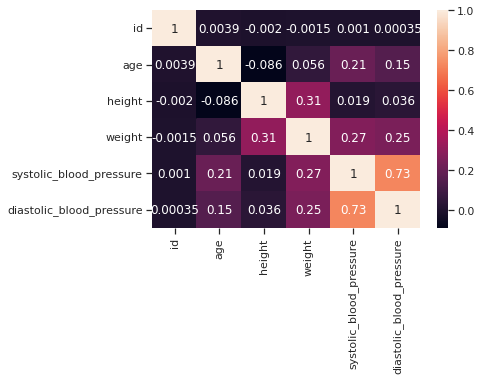

In [ ]:
# Sample data into 5000 records
sample_df = df.sample(n=5000, replace=False, random_state=1)
sample_df.shape
sample_df = sample_df.drop("id", axis=1)
sample_df.to_csv(r'sampled_cardio_clean.csv', index = False)

# correlation matrix
# fig, axes = plt.subplots(nrows=2)
orginal_corr = df.corr()
sns.heatmap(orginal_corr, annot = True)
df.dtypes

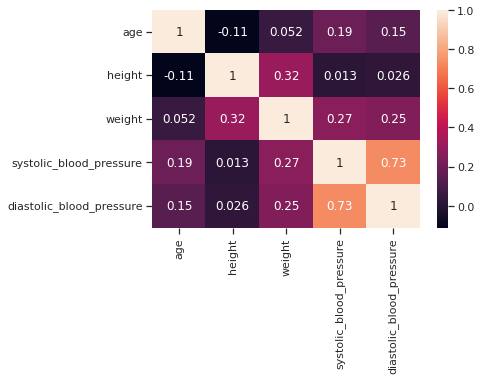

In [ ]:
sample_corr = sample_df.corr()

sns.heatmap(sample_corr, annot = True)

In [ ]:
mask = np.zeros_like(sample_corr)
mask[np.triu_indices_from(mask)] = True

In [ ]:

chi_df = sample_df[['smoke','alcohol','physical_activity']].reset_index(drop=True)
display(chi_df)


,smoke,alcohol,physical_activity
0,0,0,0
1,0,0,1
2,0,0,1
3,0,1,1
4,0,0,1
...,...,...,...
4995,0,0,1
4996,0,0,1
4997,0,0,1
4998,0,1,1


                           smoke        alcohol  physical_activity
smoke               0.000000e+00  3.167438e-115           0.137460
alcohol            1.580789e-118   0.000000e+00           0.578518
physical_activity   4.872344e-01   7.978454e-01           0.000000


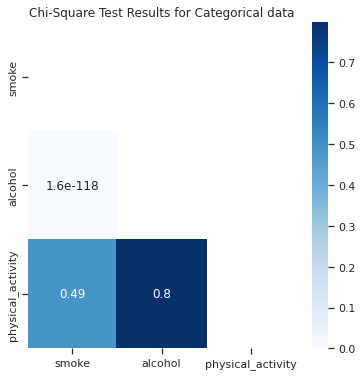

In [ ]:
#chi-sqaured test for categorical variables and plotting it
from sklearn.feature_selection import chi2

chi = pd.DataFrame(data=[(0 for i in range(len(chi_df.columns))) for i in range(len(chi_df.columns))], 
                         columns=list(chi_df.columns))
chi.set_index(pd.Index(list(chi_df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(chi_df.columns):
    for j in list(chi_df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(chi_df[i]).reshape(-1, 1), np.array(chi_df[j]).reshape(-1, 1))
            chi.loc[i,j] = p_val
print(chi)

mask = np.zeros_like(chi)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(6,6))
sns.heatmap(chi, annot=True,cmap='Blues', mask = mask)
plt.title('Chi-Square Test Results for Categorical data')


plt.show()

# if p-value is < 0.05 then it's highly correlated

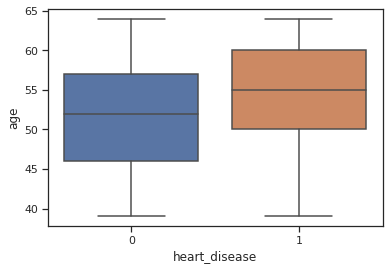

In [ ]:
# age range of subjects having heart disease vs subjects not having heart disease

sns.boxplot(data = sample_df, x ='heart_disease' , y = 'age')

,smoke,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,alcohol,physical_activity,heart_disease
0,0,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265
1,1,182,182,182,182,182,182,182,182,182,182,182


,smoke,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,alcohol,physical_activity,heart_disease
0,0,4562,4562,4562,4562,4562,4562,4562,4562,4562,4562,4562
1,1,438,438,438,438,438,438,438,438,438,438,438


,smoke,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,alcohol,physical_activity,heart_disease
0,0,2297,2297,2297,2297,2297,2297,2297,2297,2297,2297,2297
1,1,256,256,256,256,256,256,256,256,256,256,256


12.445054945054945
8.97265625
10.415525114155251


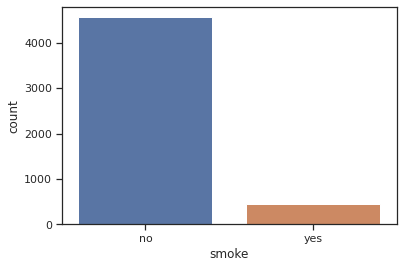

In [ ]:
# smoke situation for those who have heart disease
smoke_df = sample_df.groupby('smoke', as_index=False).count()
smoke_patient_df = sample_df[sample_df.heart_disease==1].groupby('smoke', as_index=False).count()
display(smoke_patient_df)
display(smoke_df)

smoke_hel_df = sample_df[sample_df.heart_disease==0].groupby('smoke', as_index=False).count()
display(smoke_hel_df)


fig1 = sns.barplot(data=smoke_df, x='smoke', y='age') ## data matters
fig1.set_xticklabels(['no', 'yes'])
fig1.set_ylabel('count')
plt.savefig('smoke_ratio_all.png')

print(2265/182)
print(2297/256)
print(4562/438)

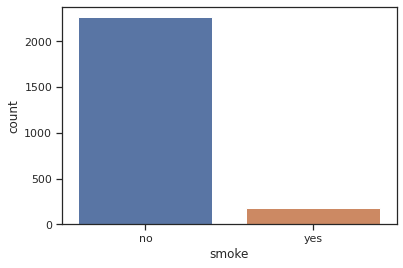

In [ ]:
fig2 = sns.barplot(data=smoke_patient_df, x='smoke', y='age') ## data matters
fig2.set_xticklabels(['no', 'yes'])
fig2.set_ylabel('count')
plt.savefig('smoke_ratio_patient.png')

In [ ]:
# Data Transformation
## Dummy coding 
dm_df = pd.get_dummies(sample_df, columns=['gender'], prefix_sep='_')
dm_df = dm_df.rename(columns={'gender_1':'female', 'gender_2': 'male'})
# dm_df.head()

## Get feture and target variable
target = ['heart_disease']
num_predictors = sample_df._get_numeric_data().columns
print(num_predictors)

## Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ds_df = dm_df.copy()
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(ds_df[num_predictors]),
            index=ds_df.index, columns=num_predictors)
norm_df
cat_df = dm_df[['female','male','cholesterol','glucose','alcohol','physical_activity']]

#final normalized dataframe with categorical variables too
normalized = pd.concat([norm_df,cat_df], axis =1)
normalized.reset_index(drop = True)

norm_X = normalized
df_y = ds_df[target]

print(norm_X.shape)
print(df_y.shape)

## Split data into training, validation, test data || norm_df
from sklearn.model_selection import train_test_split
norm_X_train, norm_X_test, y_train, y_test = train_test_split(norm_X, df_y, test_size=0.3, random_state=1)
display(norm_X_train.shape)
display(norm_X_test.shape)
display(y_train.shape)
display(y_test.shape)

## Demension reduction, PCA & MDS
### PCA is intended for lots of numeric variables, and
### suitable for those are on the same scale and highly correlated
### let's explore it a bit!
# from sklearn.preprocessing import PCA
# pcs = PCA()
# norm_df.shape



Index(['age', 'height', 'weight', 'systolic_blood_pressure',
       'diastolic_blood_pressure'],
      dtype='object')
(5000, 11)
(5000, 1)


(3500, 11)

(1500, 11)

(3500, 1)

(1500, 1)

,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure,female,male,cholesterol,glucose,alcohol,physical_activity
0,-0.718578,0.190185,-0.281443,1.410169,0.909353,0,1,1,1,0,0
1,-1.161233,0.704614,1.249235,-0.097169,0.388973,0,1,1,1,0,1
2,1.494700,-1.738927,-1.325088,0.204299,-0.131406,1,0,1,1,0,1
3,-0.128370,0.447400,0.762201,-1.001572,-1.172165,0,1,1,1,1,1
4,-0.571026,0.061577,0.553472,-1.001572,-0.131406,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.166734,0.061577,-0.629325,-0.398637,-0.131406,1,0,1,1,0,1
4996,-2.046544,-0.967282,1.040506,-0.398637,-0.131406,1,0,1,1,0,1
4997,-0.275922,1.219044,-1.116359,-0.398637,-0.131406,1,0,1,3,0,1
4998,0.756941,-0.067030,0.553472,0.204299,0.909353,1,0,1,1,1,1
